In [37]:
# Importing the Libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Loading the Data
df = pd.read_excel('nba_player_data.xlsx')

# Data Cleaning
df.drop(columns=['RANK'], inplace=True)
df['season_start_year'] = df['Year'].str[:4].astype(int)
df['TEAM'] = df['TEAM'].replace(to_replace=['NOP','NOH'], value='NO')
df['Season_type'] = df['Season_type'].replace('Regular%20Season','Regular Season')

In [38]:
# Create PPG column
df['PPG'] = df['PTS'] / df['GP']

# Filter for only regular season data
df_rs = df[df['Season_type'] == 'Regular Season']

In [46]:
# Filter for players with at least 10 PPG
df_rs_10 = df_rs[df_rs['PPG'] >= 10].copy()

In [59]:
# Set value for number of top scorers to display in visualization
top_scorers = 100

# Set value for sorting the dataframe i.e. PPG or FG%
sort_value = 'PPG'

# Create dataframe for the top scorers based on PPG and FG%
df_ppg_eff = df_rs_10[['PLAYER', 'Year', 'PPG', 'FG_PCT']].sort_values(by=sort_value, ascending=False).head(top_scorers)

In [60]:
df_ppg_eff

,PLAYER,Year,PPG,FG_PCT
4204,James Harden,2018-19,36.128205,0.442
4946,James Harden,2019-20,34.338235,0.444
677,Kevin Durant,2013-14,32.012346,0.503
5692,Stephen Curry,2020-21,31.984127,0.482
2753,Russell Westbrook,2016-17,31.580247,0.425
...,...,...,...,...
5705,De'Aaron Fox,2020-21,25.189655,0.477
2757,Karl-Anthony Towns,2016-17,25.134146,0.542
2777,Kevin Durant,2016-17,25.080645,0.537
2066,Damian Lillard,2015-16,25.053333,0.419


(0.2, 0.6)

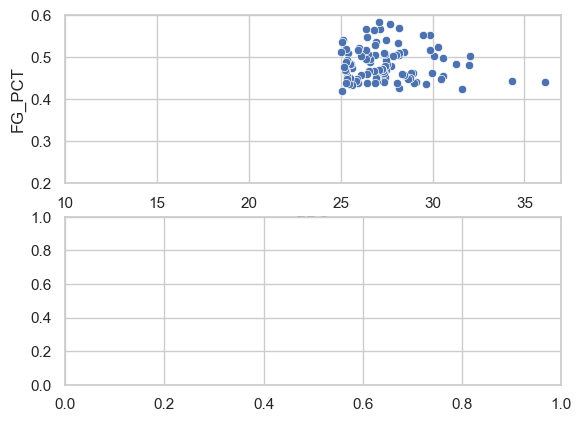

In [61]:
fig, ax = plt.subplots(2, 1)

sns.set_theme(style='whitegrid')

sns.scatterplot(data = df_ppg_eff, x='PPG', y='FG_PCT', ax=ax[0])

ax[0].set_xlim(10,37)
ax[0].set_ylim(0.2,0.6)